In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
!wget https://www.tesla.com/xNVh4yUEc3B9/04_Desktop.jpg -O img.jpg

--2020-09-29 15:18:57--  https://www.tesla.com/xNVh4yUEc3B9/04_Desktop.jpg
Resolving www.tesla.com (www.tesla.com)... 23.198.17.112, 2a02:26f0:6b:59f::700, 2a02:26f0:6b:5b0::700
Connecting to www.tesla.com (www.tesla.com)|23.198.17.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152850 (149K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>] 149.27K  --.-KB/s    in 0.01s   

2020-09-29 15:18:58 (11.9 MB/s) - ‘img.jpg’ saved [152850/152850]



Read our image and create another image consisting of only ones that has the same width and height as our image.

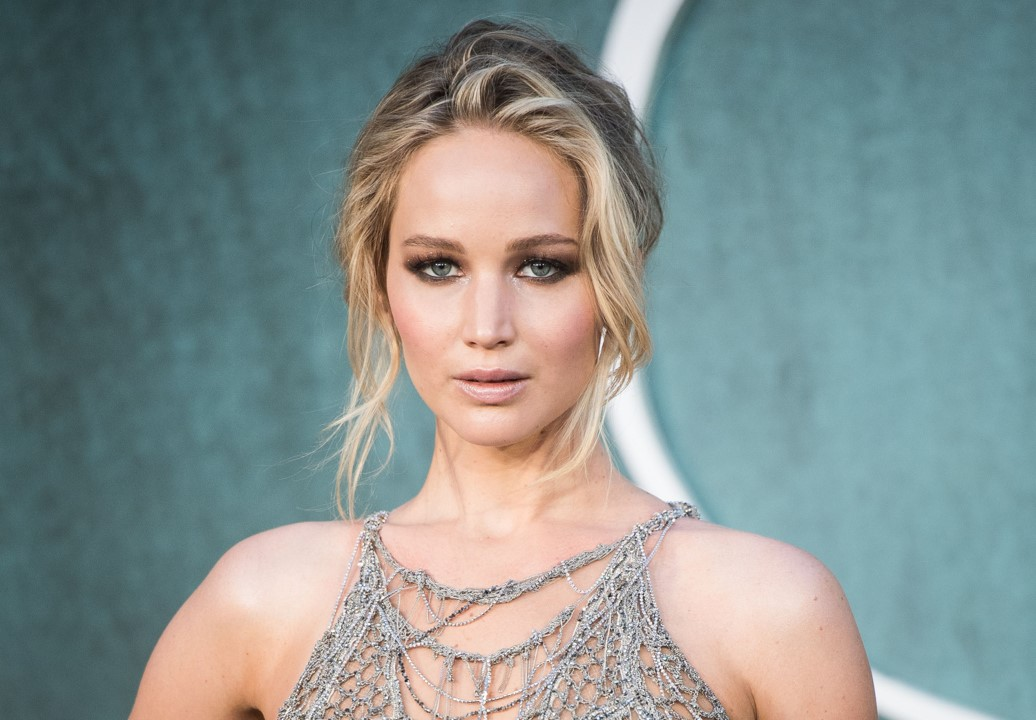

In [ ]:
img = cv2.imread("Jennifer.png")
cv2_imshow(img)

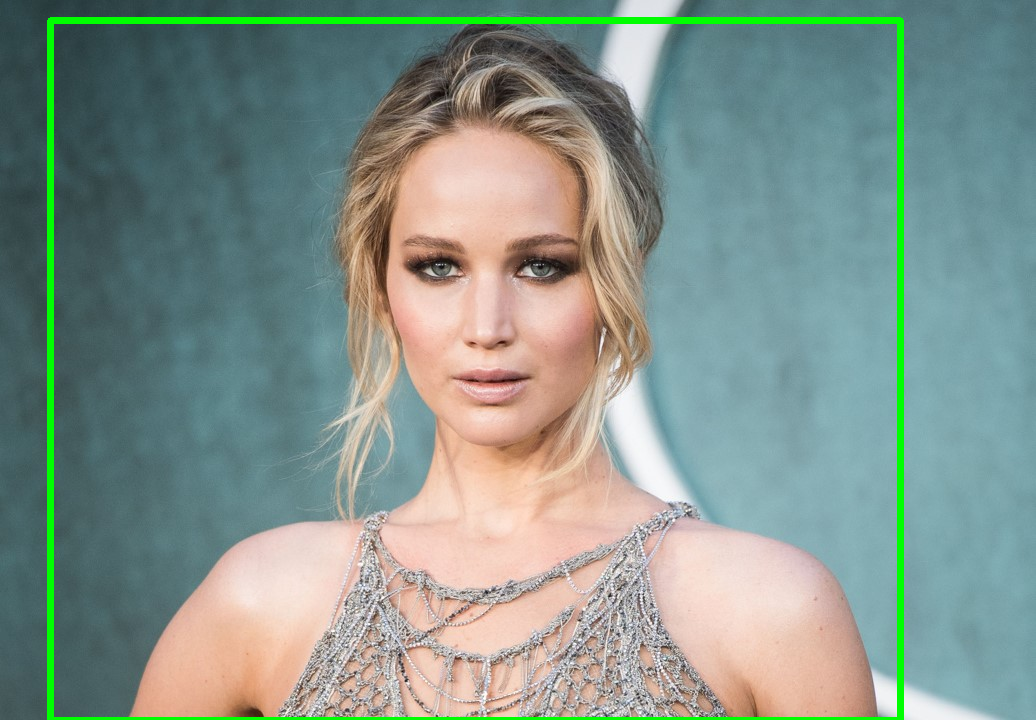

In [ ]:
cv2.rectangle(img, (50,20), (900,720), (0,255,0), (5))
cv2_imshow(img)

In [ ]:
img.shape

(720, 1036, 3)

In [ ]:
mask = np.zeros(img.shape[:2], np.uint8)

The next step would be to create a background and foreground model and points that select the object that we want to cut out. Background and Foreground will be determined based on the area left out from the rectangle.


bdgModel, fgdModel - These are arrays used by the algorithm internally. You just create two np.float64 type zero arrays of size (1,65).


In [ ]:
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# This will select what object to cut from the background
rect = (50, 20, 900, 720)

Now we will implement the grab cut method. First parameter is the image, second is the mask and third is the rectangle. Also we will pass our background and foreground model's. We will set the algorithm iteration number to 5. The mask will be stored in the variable we created earlier.

In [ ]:
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[2.59552348e-01, 1.26337551e-01, 2.85582513e-01, 2.69369920e-01,
         5.91576672e-02, 1.68155330e+02, 1.61984041e+02, 1.20722105e+02,
         8.03828688e+01, 7.75256420e+01, 5.41648724e+01, 1.32800152e+02,
         1.27560541e+02, 9.10175004e+01, 1.01841995e+02, 9.89972550e+01,
         7.10907121e+01, 1.66167126e+02, 1.63169217e+02, 1.42968314e+02,
         6.86254623e+01, 6.78058079e+01, 5.88460657e+01, 6.78058079e+01,
         6.74415072e+01, 5.85466003e+01, 5.88460657e+01, 5.85466003e+01,
         5.26728626e+01, 4.93569740e+01, 4.62487168e+01, 3.13558193e+01,
         4.62487168e+01, 4.44768715e+01, 3.09299937e+01, 3.13558193e+01,
         3.09299937e+01, 2.60539908e+01, 9.95512475e+01, 9.50214294e+01,
         7.09129733e+01, 9.50214294e+01, 9.3

We will now collect all the values from the mask we just got and filter them with the function np.where. Then we multiply our mask with the original image which will give us the cut out section. Let's see how it looks

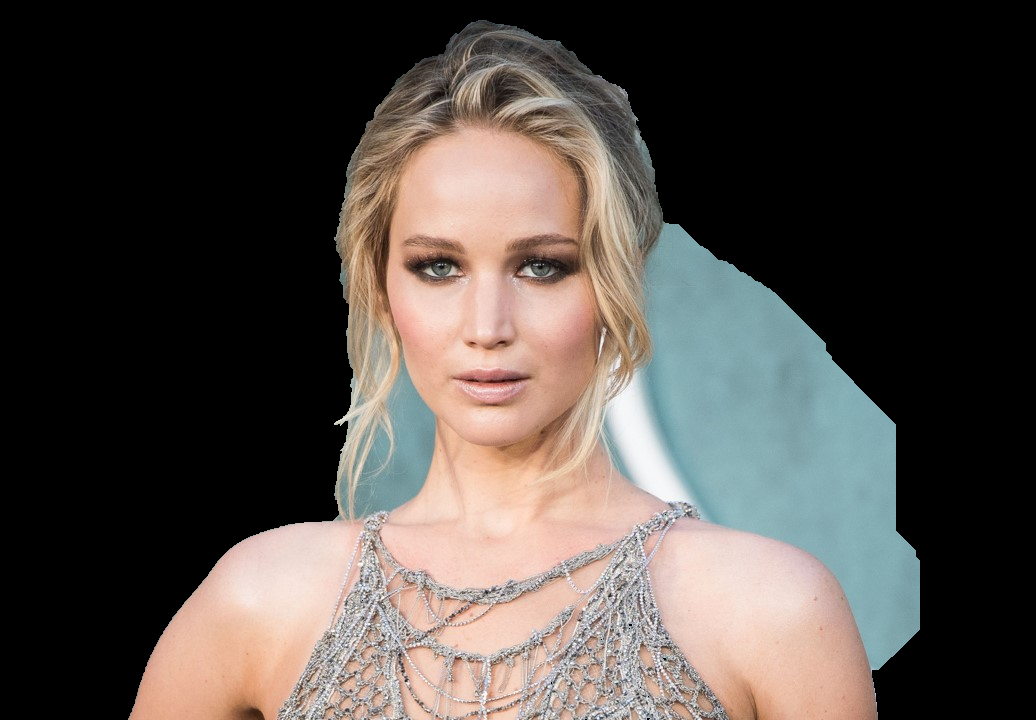

In [ ]:
mask2 = np.where((mask==2) | (mask==0), 0, 1).astype("uint8")

img = img*mask2[:,:,np.newaxis]

cv2_imshow(img)

We can see that the image is messy. Let's try and make it a bit more appealing. I loaded the image in PAINT and drew some lines where i want the modifications. It is not the prettiest, but i think it will do the job.

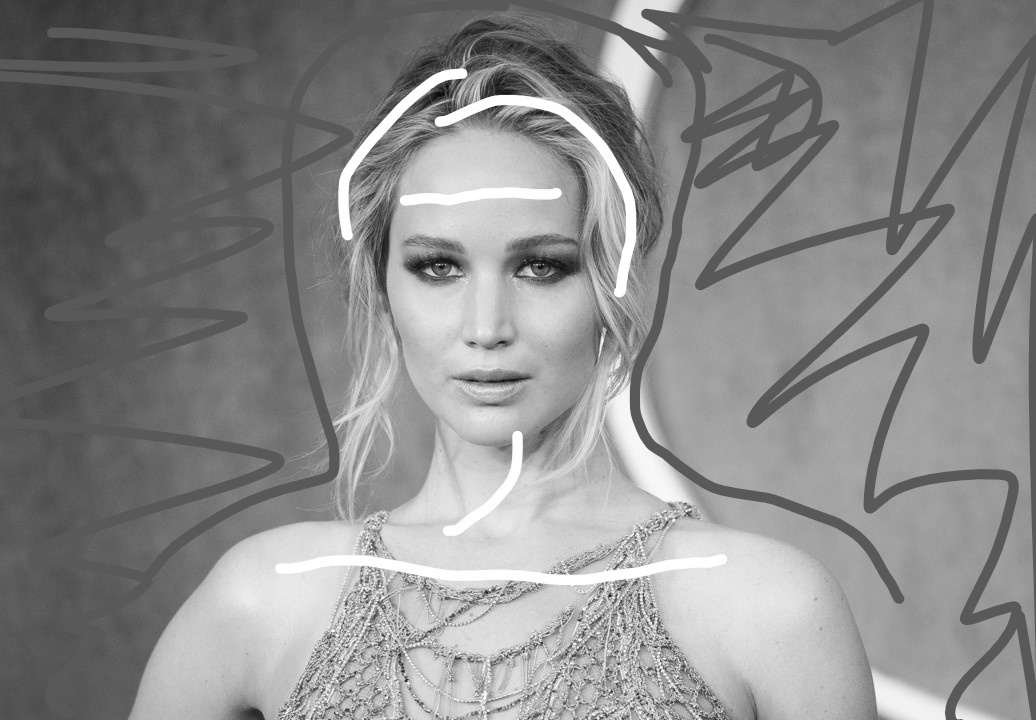

In [ ]:
new_mask = cv2.imread("Jennifer_new.jpg", 0)
cv2_imshow(new_mask)

In [ ]:
# wherever it is marked white (sure foreground), change mask=1
# wherever it is marked black (sure background), change mask=0
mask[new_mask == 0] = 0
mask[new_mask == 255] = 1

In [ ]:
mask, bgd, fgd = cv2.grabCut( img, mask, None, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_MASK)

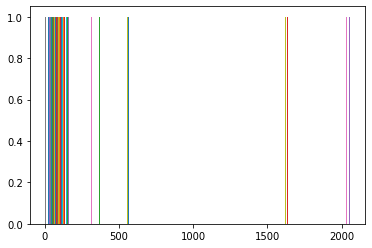

In [ ]:
import matplotlib.pyplot as plt

plt.hist(bgd, 10)
plt.hist(fgd, 10)
plt.show()

In [ ]:
mask = np.where( (new_mask==2) | (new_mask==0), 0, 1 ).astype('uint8')
img = img*mask[:,:,np.newaxis]

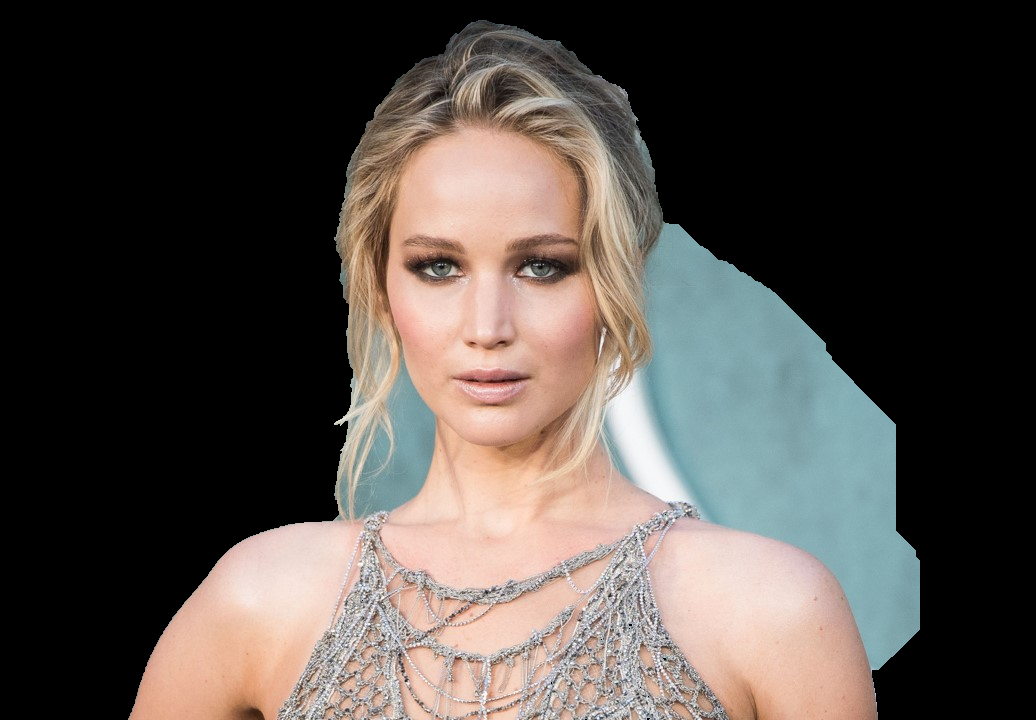

In [ ]:
cv2_imshow(img)

This way instead of finding the rectangle you can go into paint and mark what you want to get cut out.